In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

from sklearn.model_selection import GridSearchCV


In [4]:
# Load the dataset
url = 'https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv'
df = pd.read_csv(url)

# Display the first few rows of the dataset
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
# Check for missing values
df.isnull().sum()

# Fill missing values
df.fillna(df.median(), inplace=True)

# Convert categorical variables to numerical
df = pd.get_dummies(df, drop_first=True)


C:\Users\hp\AppData\Local\Temp/ipykernel_16152/1201309124.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.median(), inplace=True)


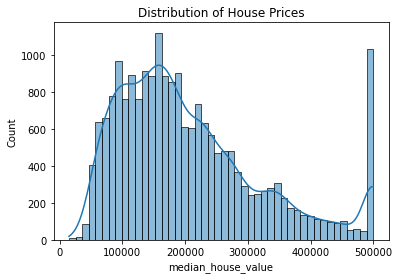

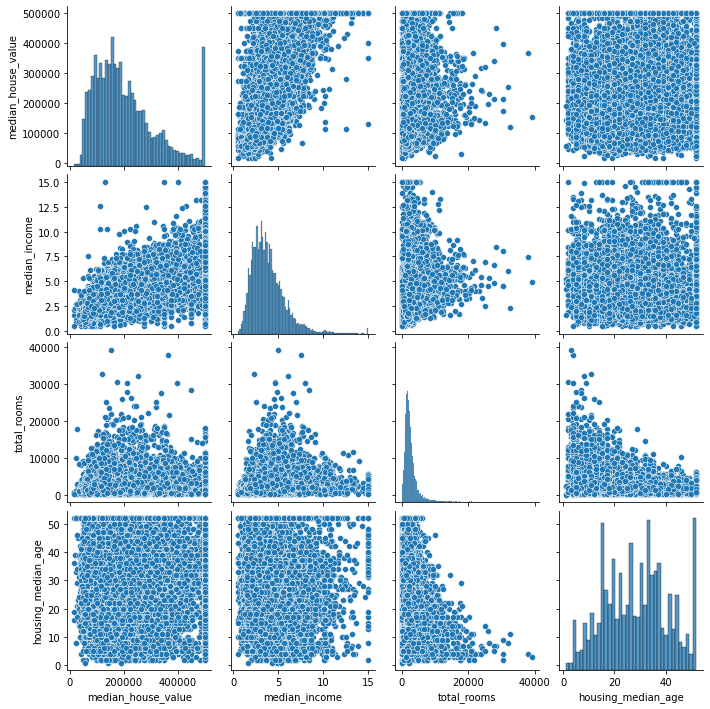

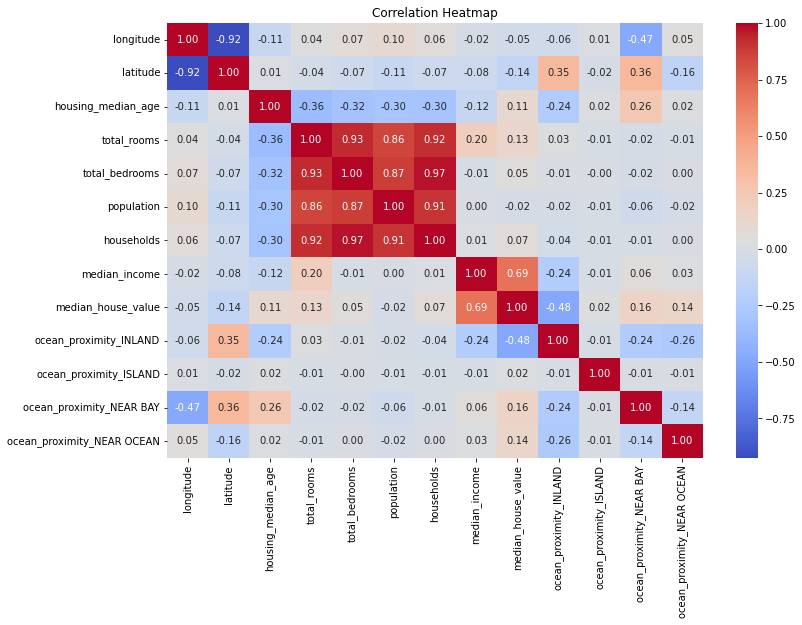

In [6]:

# Visualize the distribution of house prices
sns.histplot(df['median_house_value'], kde=True)
plt.title('Distribution of House Prices')
plt.show()

# Visualize the relationships between features and house prices
sns.pairplot(df[['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']])
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [7]:
# Create new feature: total rooms per household
df['rooms_per_household'] = df['total_rooms'] / df['households']

# Create new feature: bedrooms per room
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']

# Create new feature: population per household
df['population_per_household'] = df['population'] / df['households']


In [8]:

# Split the data into training and test sets
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Train a Random Forest model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [9]:
# Predict on the test set
y_pred_lin = lin_reg.predict(X_test)
y_pred_rf = rf_reg.predict(X_test)

# Calculate RMSE
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f'Linear Regression RMSE: {rmse_lin}')
print(f'Random Forest RMSE: {rmse_rf}')


Linear Regression RMSE: 72668.53837868235
Random Forest RMSE: 50268.15081690922


In [10]:

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_reg, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best model
best_rf = grid_search.best_estimator_

# Predict and evaluate the tuned model
y_pred_best_rf = best_rf.predict(X_test)
rmse_best_rf = np.sqrt(mean_squared_error(y_test, y_pred_best_rf))

print(f'Best Random Forest RMSE: {rmse_best_rf}')


Best Random Forest RMSE: 50017.54611739989
